In [33]:
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, FullyObsWrapper
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from discovery.environments.custom_minigrids import TwoRoomEnv
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from stable_baselines3 import PPO
from discovery.utils.feat_extractors import (
    ClimbingFeatureExtractor,
    MinigridFeaturesExtractor,
)
from stable_baselines3.common.utils import obs_as_tensor


from discovery.utils import sg_detection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import tqdm
import torch.nn as nn
import torch.optim as optim
import importlib

import functools

from importlib import reload

sg_detection = importlib.reload(sg_detection)


In [41]:
from discovery.class_analysis import lib
lib = reload(lib)


In [35]:
obss, images, labels, coords, dirs = lib.create_dataset()
print("Number of observations: ", len(obss))

Number of observations:  292


In [9]:
obss[0][0].shape

(15, 8, 3)

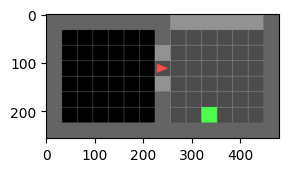

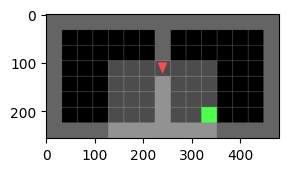

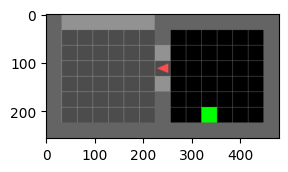

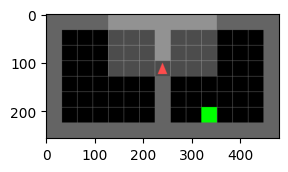

In [10]:
for idx, image in enumerate(images):
    if labels[idx] == 1:
        plt.figure(figsize=(3, 3))
        plt.imshow(image)


In [16]:
# load the model trained on single task setting
model = PPO.load("/Users/szepi1991/Code/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_5i6lt53x.zip")
# model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_oesjuzgc.zip")

In [17]:
feats = lib.obs_to_feats(model, obss)

In [18]:
clf = sg_detection.LinearClassifier(input_size=32)
acc = lib.train_classifier(clf, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 1160.29batch/s, acc=0.333, loss=0.682]


In [23]:
accuracy, conf_mat = lib.see_log_reg(clf, feats, labels, coords, dirs)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.50, 0.51, 0.51, 0.50, 0.50, 0.50,  nan, 0.53, 0.49, 0.44, 0.47, 0.48, 0.50],
        [ nan, 0.50, 0.52, 0.52, 0.52, 0.50, 0.50, 0.53, 0.52, 0.50, 0.47, 0.49, 0.51, 0.51],
        [ nan, 0.49, 0.49, 0.50, 0.51, 0.50, 0.49,  nan, 0.51, 0.48, 0.46, 0.49, 0.50, 0.51],
        [ nan, 0.49, 0.50, 0.51, 0.51, 0.49, 0.49,  nan, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.51, 0.48,  nan, 0.51, 0.52, 0.50, 0.49, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.51,  nan, 0.50, 0.51, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.47, 0.50, 0.51, 0.50, 0.49, 0.50,  nan, 0.50, 0.49, 0.49, 0.50, 0.51, 0.50],
        [ nan, 0.46, 0.51, 0.52, 0.51, 0.50, 0.49, 0.52, 0.

In [24]:
clf_nonlin = sg_detection.NonLinearClassifier(input_size=32, hidden_size=64)
acc_nonlin = lib.train_classifier(clf_nonlin, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 277.90batch/s, acc=1, loss=0.36]     


In [25]:
accuracy, conf_mat = lib.see_log_reg(clf, feats, labels, coords, dirs)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.50, 0.51, 0.51, 0.50, 0.50, 0.50,  nan, 0.53, 0.49, 0.44, 0.47, 0.48, 0.50],
        [ nan, 0.50, 0.52, 0.52, 0.52, 0.50, 0.50, 0.53, 0.52, 0.50, 0.47, 0.49, 0.51, 0.51],
        [ nan, 0.49, 0.49, 0.50, 0.51, 0.50, 0.49,  nan, 0.51, 0.48, 0.46, 0.49, 0.50, 0.51],
        [ nan, 0.49, 0.50, 0.51, 0.51, 0.49, 0.49,  nan, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.51, 0.48,  nan, 0.51, 0.52, 0.50, 0.49, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.51,  nan, 0.50, 0.51, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.47, 0.50, 0.51, 0.50, 0.49, 0.50,  nan, 0.50, 0.49, 0.49, 0.50, 0.51, 0.50],
        [ nan, 0.46, 0.51, 0.52, 0.51, 0.50, 0.49, 0.52, 0.

# Newer variant

In [43]:


minigrid = lib.MiniGridData()
obs_to_feats = functools.partial(lib.obs_to_feats, model)
obss, images, labels = minigrid.get_data()
feats = obs_to_feats(obss)
clf = sg_detection.LinearClassifier(input_size=32)
best_acc = lib.train_classifier(clf, feats, labels)


Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 1167.84batch/s, acc=0.889, loss=0.669]


In [44]:
acc, conf_mat = lib.evaluate(clf, feats, labels)
minigrid.visualize(clf, obs_to_feats)

print("Accuracy: ", acc)
print("Confusion matrix: \n", conf_mat)


tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50],
        [ nan, 0.49, 0.51, 0.51, 0.51, 0.51, 0.50,  nan, 0.52, 0.48, 0.42, 0.46, 0.48, 0.50],
        [ nan, 0.47, 0.49, 0.51, 0.50, 0.50, 0.51, 0.53, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.49, 0.49,  nan, 0.49, 0.45, 0.43, 0.48, 0.50, 0.50],
        [ nan, 0.49, 0.51, 0.52, 0.51, 0.49, 0.48,  nan, 0.50, 0.49, 0.45, 0.48, 0.49, 0.50],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.48,  nan, 0.49, 0.49, 0.49, 0.48, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50],
        [ nan, 0.47, 0.50, 0.50, 0.50, 0.48, 0.49,  nan, 0.49, 0.49, 0.48, 0.50, 0.50, 0.50],
        [ nan, 0.46, 0.50, 0.52, 0.50, 0.50, 0.49, 0.52, 0.

In [46]:
import wandb
api = wandb.Api()

# run = api.run("//<run_id>")
run = api.run("//szepi/TwoRoomsSingleTask/hv0www3u")
run.file("downloaded_config.yaml").download()

<_io.TextIOWrapper name='./config.yaml' mode='r' encoding='UTF-8'>